# علاء حسن & ريم حسن

Import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [2]:
url = 'https://drive.google.com/file/d/1DJGMLSyQPpemMQf-ZAjgOj-J4DHHPhrv/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
cars = pd.read_csv(path)

Data Cleaning

In [3]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [4]:
cars.shape

(428, 15)

In [5]:
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

fill null data

In [6]:
cars["Cylinders"].fillna(cars["Cylinders"].mean(), inplace = True)

Remove the '$' and ',' character from the MSRP and Invoice columns

In [7]:
cars['MSRP'] = cars['MSRP'].replace({'\$': '', '\,': ''}, regex=True)
cars['Invoice'] = cars['Invoice'].replace({'\$': '', '\,': ''}, regex=True)

Convert the MSRP and Invoice columns from strings to floats

In [8]:
cars['MSRP'] = cars['MSRP'].astype(float)
cars['Invoice'] = cars['Invoice'].astype(float)

Data Visualization

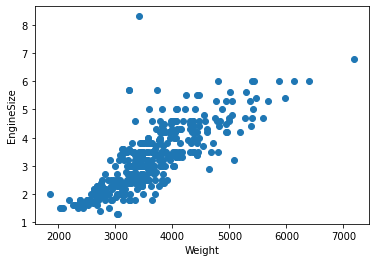

In [9]:
plt.scatter(cars.Weight, cars.EngineSize)
plt.xlabel("Weight")
plt.ylabel("EngineSize")
plt.show()

كلما ازداد الوزن ازدادت سعة المحرك

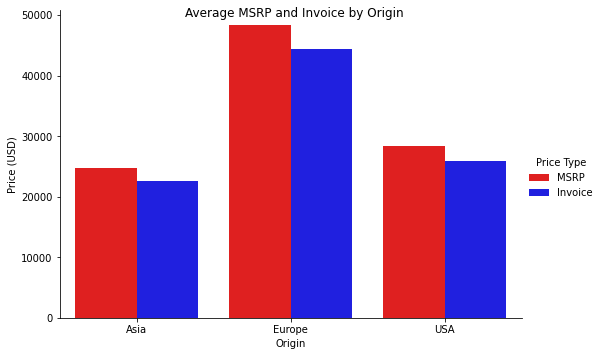

In [10]:
# Create a new DataFrame with the mean of MSRP and Invoice for each Origin
origin_mean_data = cars.groupby('Origin')[['MSRP', 'Invoice']].mean().reset_index()

# Melt the DataFrame to combine the MSRP and Invoice columns into a single column
origin_mean_data = pd.melt(origin_mean_data, id_vars='Origin', var_name='Price Type', value_name='Price (USD)')

# Create a catplot
g = sns.catplot(data=origin_mean_data, kind='bar', x='Origin', y='Price (USD)', hue='Price Type', palette=['r', 'b'], height=5, aspect=1.5)

# Set title and axis labels
g.fig.suptitle('Average MSRP and Invoice by Origin')
g.set(xlabel='Origin', ylabel='Price (USD)')

# Show the plot
plt.show()

الأسعار مرتفعة في اوروبا إلا أنها متقاربة في أميركا و آسيا مع ارتفاع بسيط في أميركا

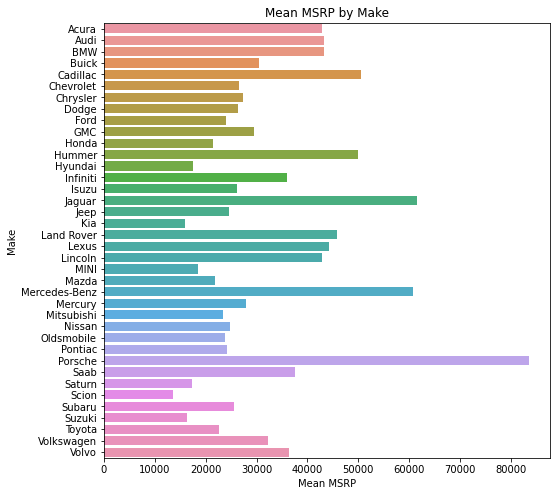

In [11]:
# Mean of MSRP column
mean_MSRP = cars.groupby('Make')['MSRP'].mean().reset_index()

# Create a new figure object with size (8, 6) inches
fig = plt.figure(figsize=(8, 8))

# Create a bar plot
sns.barplot(x='MSRP', y='Make', data=mean_MSRP)

# Set the plot title and axis labels
plt.title('Mean MSRP by Make')
plt.xlabel('Mean MSRP')
plt.ylabel('Make')

# Show the plot
plt.show()

نلاحظ أن أعلى السيارات سعرا هي سيارات (بورش) بينما الأقل هي سيارات (سيون) كما نلاحظ وجود تباين كبير في أسعر السيارات

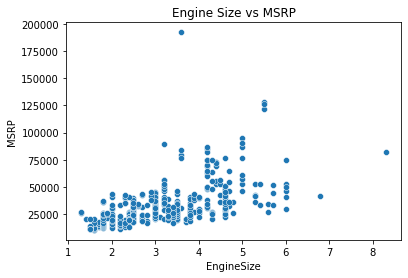

In [12]:
sns.scatterplot(data= cars, x="EngineSize", y="MSRP")
plt.title("Engine Size vs MSRP")
plt.show()

نلاحظ أن زيادة سعة المحرك تؤدي إلى زيادة بسيطة في السعر

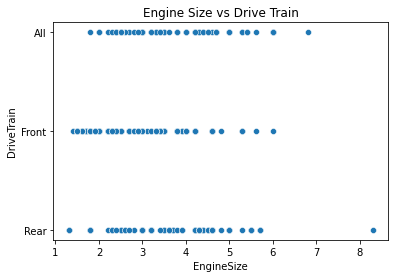

In [13]:
sns.scatterplot(data= cars, x="EngineSize", y="DriveTrain")
plt.title("Engine Size vs Drive Train")
plt.show()

لا توجد أي علاقة بين نوع الدفع وسعة المحرك

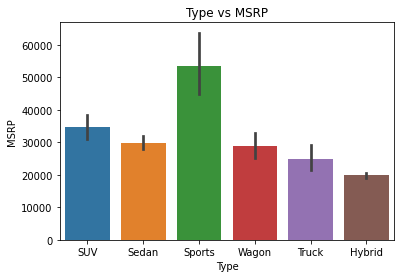

In [14]:
sns.barplot(data= cars, x="Type", y="MSRP")
plt.title("Type vs MSRP")
plt.show()

نلاحظ أن السيارات الرياضية هي الأعلى سعرا في حين أن السيارات الهجينة هي الأقل سعرا في حين أن أسعار باقي السيارات متقاربة

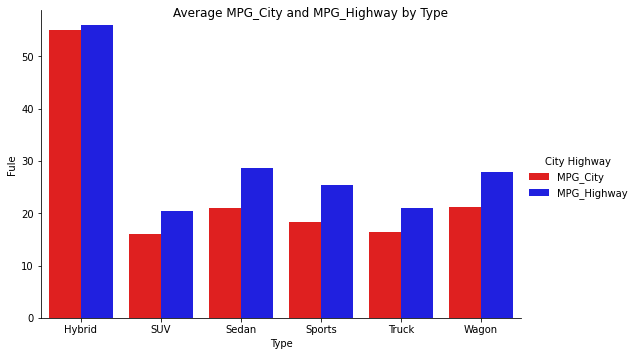

In [15]:
# Create a new DataFrame with the mean of MPG_City and MPG_Highway for each Origin
type_mean_fuel = cars.groupby('Type')[['MPG_City', 'MPG_Highway']].mean().reset_index()

# Melt the DataFrame to combine the MSRP and Invoice columns into a single column
type_mean_fuel = pd.melt(type_mean_fuel, id_vars='Type', var_name='City Highway', value_name='fule')

# Create a catplot
f = sns.catplot(data=type_mean_fuel, kind='bar', x='Type', y='fule', hue='City Highway', palette=['r', 'b'], height=5, aspect=1.5)

# Set title and axis labels
f.fig.suptitle('Average MPG_City and MPG_Highway by Type')
f.set(xlabel='Type', ylabel='Fule')

# Show the plot
plt.show()

السيارات الهجينة هي الأكثر استهلاكا للوقود في حين أن السيارات المخصصة للمناطق الوعرة هي الأقل استهلاكأ

الفرق في الاستهلاك بين المدن والطرق السريعة صغير بالنسبة للسيارات الهجينة أما الفارق في باقي الأنواع فهو أكبر